Accuracy: 0.97

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



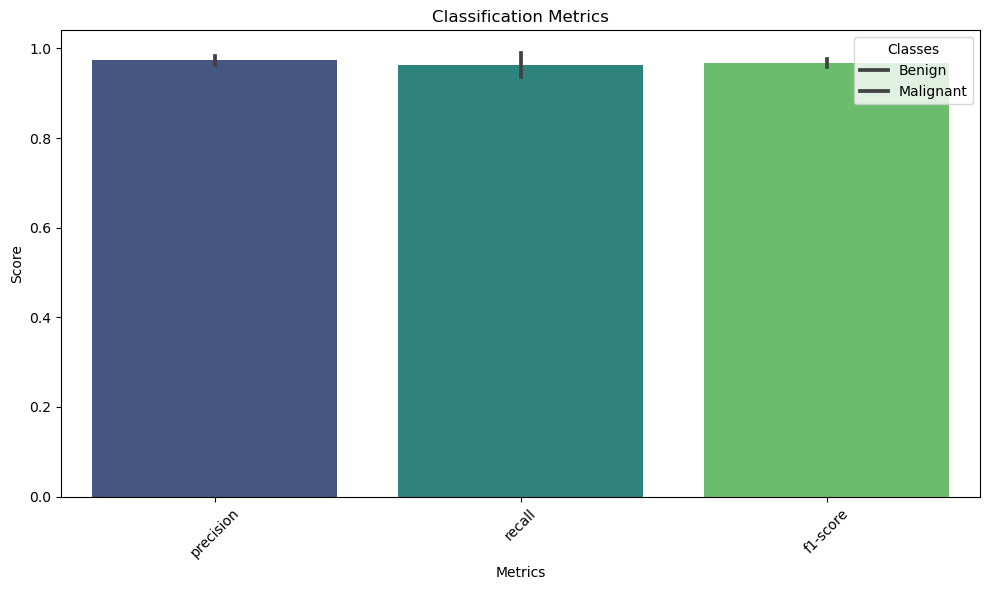

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('breastcancer.csv')

# Drop unnecessary columns
data = data.drop(columns=['id', 'Unnamed: 32'])

# Encode the target variable: 'M' -> 1 (Malignant), 'B' -> 0 (Benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Define features (X) and target (y)
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Barplot for metrics
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, palette="viridis")
plt.title("Classification Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.legend(title="Classes", labels=["Benign", "Malignant"], loc="upper right")
plt.tight_layout()
plt.show()
